In [1]:
!pip install category_encoders
!pip install imbalanced-learn
!pip install xgboost
!pip install catboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from numpy import mean
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import fbeta_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/heart_2020_cleaned.csv"
df = pd.read_csv(path)

Mounted at /content/drive


In [8]:
#convert yes and no to numerical values
df['HeartDisease']=df['HeartDisease'].replace("No",0)
df['HeartDisease']=df['HeartDisease'].replace("Yes",1)

In [9]:
def categorical_and_numerical_columns(dataset):
  """ The function returns the list of the columns names in the dataframe that are of the datatype "object" (categorical)
  and numerical"""
  #Note: Do not add the target variable to the list of column names as we are trying to extract the names of the predictor variables

  categorical_col = []
  numerical_col = []
  target_col = "HeartDisease"

  categorical_col = [col for col in dataset.columns if dataset[col].dtype=="O"]
  if target_col in categorical_col:
    categorical_col.remove(target_col)

  numeric_dtype = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  numerical_col = [col for col in dataset.columns if dataset[col].dtype in numeric_dtype]
  if target_col in numerical_col:
    numerical_col.remove(target_col)

  return categorical_col, numerical_col,[target_col]

categorical_col, numerical_col,target_col = categorical_and_numerical_columns(df)
print("Categorical columns:", categorical_col)
print("Numerical columns:", numerical_col)
print("Target column:", target_col)

Categorical columns: ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Numerical columns: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Target column: ['HeartDisease']


### Feature Creation

In [10]:
X=df.drop(target_col, axis=1)
y=df[target_col]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

In [11]:
def eval_score(score):
  print(score)
  keys= ['test_accuracy','test_phi_scorer','test_precision','test_recall','test_f1','test_roc_auc', 'test_f0.5', 'test_f2']
  key_val = []
  score_dict = {}
  for key in keys:
    val = mean(score[key])
    key_val.append(val)
    score_dict[key[5:]] = val

  plt.bar(range(len(score_dict)), list(score_dict.values()), align='center')
  plt.xticks(range(len(score_dict)), list(score_dict.keys()), rotation = 90)
  plt.show()

  print(key_val)
  print(score_dict)

  return key_val,score_dict;

### **GRIDSEARCHCV results**

"Logreg": LogisticRegression(solver='lbfgs', C = 100, penalty = 'l2'),

"KNN": KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', algorithm = 'auto', leaf_size = 5),



"AdaBoost": AdaBoostClassifier(random_state=42, algorithm='SAMME.R', learning_rate=0.8, n_estimators=400),

——“GBC": GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7),

"LGBM": LGBMClassifier(max_bin=255, n_estimators=100,lambda_l1= 10, lambda_l2=10, max_depth=5, min_data_in_leaf=10, num_leaves= 10),

——”CatBoost": CatBoostClassifier(iterations=500,learning_rate=0.02,depth=12,eval_metric='AUC',random_seed = 42,bagging_temperature = 0.2,od_type='Iter',od_wait=100),

"XGBoost": XGBClassifier(tree_method='approx', max_bin=255, n_estimators=100, objective=‘binary:logistic’, scale_pos_weight = 11),



——"DT": DecisionTreeClassifier(random_state = 42, max_depth=10, max_leaf_nodes=15, class_weight='balanced'), #max_features = 10

"RF": RandomForestClassifier(n_estimators = 10, max_depth = 5, min_samples_leaf =0.1, min_samples_split= 2, max_leaf_nodes = 15, max_features = 'sqrt'),

——"LinearSVM": SVC(probability=True, kernel='linear'),

——"RbfSVM": SVC(probability=True, kernel='rbf'),

"NB": GaussianNB(var_smoothing = 1)

Model:Logreg and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

{'fit_time': array([5.58963537, 4.86618495]), 'score_time': array([1.75124073, 1.77754879]), 'test_accuracy': array([0.91543801, 0.91528948]), 'test_phi_scorer': array([0.22381529, 0.21310974]), 'test_precision': array([0.72467669, 0.72343565]), 'test_recall': array([0.5557393 , 0.55081526]), 'test_f1': array([0.57654862, 0.56931308]), 'test_f0.5': array([0.62598553, 0.61798963]), 'test_f2': array([0.55977645, 0.55400505]), 'test_roc_auc': array([0.83593776, 0.83963347])}


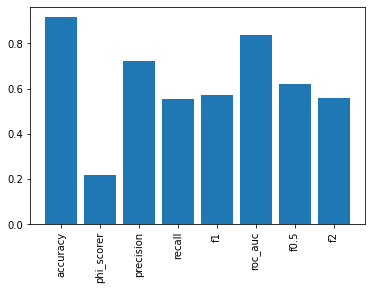

[0.9153637486514798, 0.21846251854427295, 0.7240561678162083, 0.5532772805784836, 0.572930846327522, 0.8377856115763573, 0.6219875785212701, 0.5568907502256153]
{'accuracy': 0.9153637486514798, 'phi_scorer': 0.21846251854427295, 'precision': 0.7240561678162083, 'recall': 0.5532772805784836, 'f1': 0.572930846327522, 'roc_auc': 0.8377856115763573, 'f0.5': 0.6219875785212701, 'f2': 0.5568907502256153}
****** Scores_oversample *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

{'fit_time': array([10.93896317, 12.79000878]), 'score_time': array([2.07489729, 3.01386499]), 'test_accuracy': array([0.76298097, 0.75861099]), 'test_phi_scorer': array([0.32106201, 0.3224847 ]), 'test_precision': array([0.60002157, 0.59978349]), 'test_recall': array([0.75764647, 0.76055508]), 'test_f1': array([0.60335411, 0.60140606]), 'test_f0.5': array([0.59367254, 0.59249501]), 'test_f2': array([0.65728055, 0.65615207]), 'test_roc_auc': array([0.83477564, 0.83859724])}


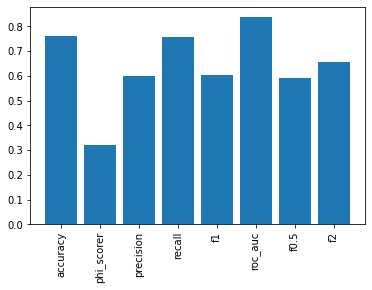

[0.760795978673838, 0.32177335410778485, 0.5999025273109262, 0.7591007772451699, 0.6023800814956377, 0.8366864372532528, 0.5930837748425469, 0.6567163110281182]
{'accuracy': 0.760795978673838, 'phi_scorer': 0.32177335410778485, 'precision': 0.5999025273109262, 'recall': 0.7591007772451699, 'f1': 0.6023800814956377, 'roc_auc': 0.8366864372532528, 'f0.5': 0.5930837748425469, 'f2': 0.6567163110281182}
****** scores_overunder *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

{'fit_time': array([9.97947073, 9.5284915 ]), 'score_time': array([2.91443849, 3.32282019]), 'test_accuracy': array([0.84856705, 0.85437546]), 'test_phi_scorer': array([0.33275316, 0.33810248]), 'test_precision': array([0.62624744, 0.63066644]), 'test_recall': array([0.71926122, 0.71871202]), 'test_f1': array([0.65129834, 0.65603495]), 'test_f0.5': array([0.63316503, 0.63802031]), 'test_f2': array([0.68393948, 0.68677034]), 'test_roc_auc': array([0.8358438 , 0.84040549])}


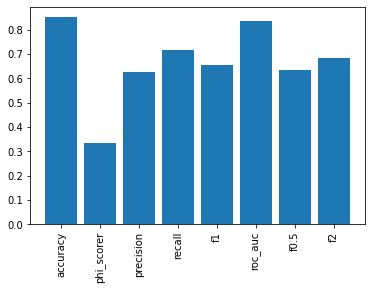

[0.851471255022749, 0.33542781965534224, 0.6284569385883491, 0.7189866193683999, 0.6536666435154329, 0.8381246423222293, 0.6355926732090391, 0.685354906764817]
{'accuracy': 0.851471255022749, 'phi_scorer': 0.33542781965534224, 'precision': 0.6284569385883491, 'recall': 0.7189866193683999, 'f1': 0.6536666435154329, 'roc_auc': 0.8381246423222293, 'f0.5': 0.6355926732090391, 'f2': 0.685354906764817}
****** scores_overadasyn *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

{'fit_time': array([40.97473073, 44.32417274]), 'score_time': array([3.29418135, 3.28694248]), 'test_accuracy': array([0.7520521 , 0.74792445]), 'test_phi_scorer': array([0.3172986 , 0.31779307]), 'test_precision': array([0.59747709, 0.597089  ]), 'test_recall': array([0.75821041, 0.76005117]), 'test_f1': array([0.59642528, 0.59433977]), 'test_f0.5': array([0.58891655, 0.58762756]), 'test_f2': array([0.65095132, 0.64938827]), 'test_roc_auc': array([0.83423926, 0.83710396])}


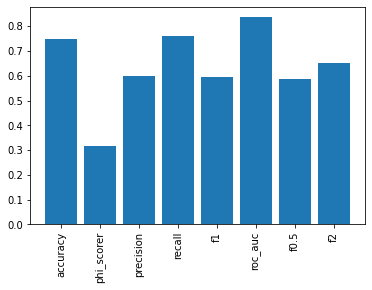

[0.7499882737378634, 0.31754583481445203, 0.5972830479058725, 0.7591307912552113, 0.5953825250210927, 0.8356716090232359, 0.5882720552279257, 0.6501697927070513]
{'accuracy': 0.7499882737378634, 'phi_scorer': 0.31754583481445203, 'precision': 0.5972830479058725, 'recall': 0.7591307912552113, 'f1': 0.5953825250210927, 'roc_auc': 0.8356716090232359, 'f0.5': 0.5882720552279257, 'f2': 0.6501697927070513}
Model:AdaBoost and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([54.23497367, 54.49024391]), 'score_time': array([33.71758032, 34.11020446]), 'test_accuracy': array([0.91535984, 0.91518004]), 'test_phi_scorer': array([0.22551965, 0.21130737]), 'test_precision': array([0.72347045, 0.721922  ]), 'test_recall': array([0.55689691, 0.55030011]), 'test_f1': array([0.57816567, 0.56851069]), 'test_f0.5': array([0.62741545, 0.6168297 ]), 'test_f2': array([0.56112516, 0.55340084]), 'test_roc_auc': array([0.83954329, 0.8418735 ])}


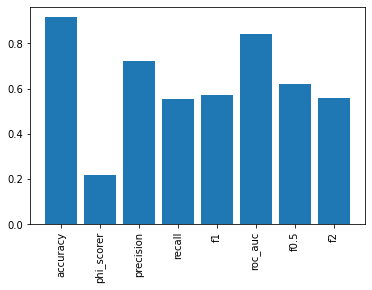

[0.9152699385543864, 0.2184135092685162, 0.7226962270516947, 0.553598509642253, 0.5733381764296304, 0.8407083987328894, 0.6221225743657375, 0.5572629954503961]
{'accuracy': 0.9152699385543864, 'phi_scorer': 0.2184135092685162, 'precision': 0.7226962270516947, 'recall': 0.553598509642253, 'f1': 0.5733381764296304, 'roc_auc': 0.8407083987328894, 'f0.5': 0.6221225743657375, 'f2': 0.5572629954503961}
****** Scores_oversample *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([141.68491077, 136.07117248]), 'score_time': array([34.54379869, 27.50246954]), 'test_accuracy': array([0.91108366, 0.91145109]), 'test_phi_scorer': array([0.25868419, 0.25531924]), 'test_precision': array([0.69181396, 0.69319606]), 'test_recall': array([0.58721668, 0.58435461]), 'test_f1': array([0.61353608, 0.6106014 ]), 'test_f0.5': array([0.64913758, 0.64750288]), 'test_f2': array([0.59466482, 0.59163602]), 'test_roc_auc': array([0.83458364, 0.83598582])}


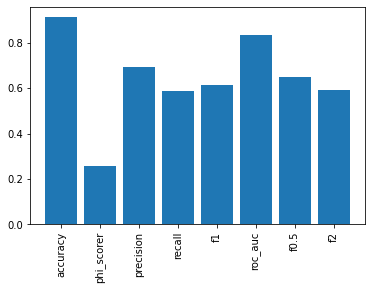

[0.9112673744117326, 0.25700171754547185, 0.6925050140875966, 0.5857856476208887, 0.6120687383090966, 0.835284731156937, 0.6483202338084891, 0.5931504216848236]
{'accuracy': 0.9112673744117326, 'phi_scorer': 0.25700171754547185, 'precision': 0.6925050140875966, 'recall': 0.5857856476208887, 'f1': 0.6120687383090966, 'roc_auc': 0.835284731156937, 'f0.5': 0.6483202338084891, 'f2': 0.5931504216848236}
****** scores_overunder *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([19.11897993, 20.19873548]), 'score_time': array([35.86161351, 35.88030028]), 'test_accuracy': array([0.85046671, 0.84987257]), 'test_phi_scorer': array([0.33462584, 0.33731761]), 'test_precision': array([0.62769424, 0.62815621]), 'test_recall': array([0.71922377, 0.72196188]), 'test_f1': array([0.6528956 , 0.65363838]), 'test_f0.5': array([0.63476841, 0.63524412]), 'test_f2': array([0.68496507, 0.68652582]), 'test_roc_auc': array([0.8396253 , 0.84150442])}


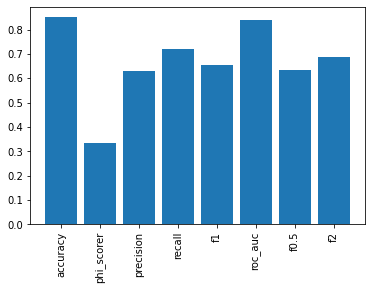

[0.8501696399255774, 0.3359717223007731, 0.6279252229495924, 0.7205928238348842, 0.6532669890898446, 0.8405648589332627, 0.6350062649872565, 0.685745443146121]
{'accuracy': 0.8501696399255774, 'phi_scorer': 0.3359717223007731, 'precision': 0.6279252229495924, 'recall': 0.7205928238348842, 'f1': 0.6532669890898446, 'roc_auc': 0.8405648589332627, 'f0.5': 0.6350062649872565, 'f2': 0.685745443146121}
****** scores_overadasyn *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([157.45898271, 163.57096529]), 'score_time': array([34.98762608, 35.13159657]), 'test_accuracy': array([0.91126347, 0.91160744]), 'test_phi_scorer': array([0.25754777, 0.2528456 ]), 'test_precision': array([0.69256555, 0.69364528]), 'test_recall': array([0.58611464, 0.58253609]), 'test_f1': array([0.61244506, 0.60863863]), 'test_f0.5': array([0.64862263, 0.64620666]), 'test_f2': array([0.59350711, 0.58968781]), 'test_roc_auc': array([0.83406464, 0.83539313])}


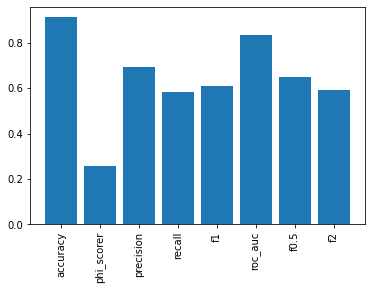

[0.9114354508356917, 0.25519668522603567, 0.6931054162681001, 0.584325366037733, 0.6105418439074783, 0.8347288844965328, 0.6474146441324516, 0.5915974590530149]
{'accuracy': 0.9114354508356917, 'phi_scorer': 0.25519668522603567, 'precision': 0.6931054162681001, 'recall': 0.584325366037733, 'f1': 0.6105418439074783, 'roc_auc': 0.8347288844965328, 'f0.5': 0.6474146441324516, 'f2': 0.5915974590530149}
Model:CatBoost and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******
0:	total: 89.1ms	remaining: 44.5s
1:	total: 130ms	remaining: 32.4s
2:	total: 156ms	remaining: 25.9s
3:	total: 318ms	remaining: 39.4s
4:	total: 346ms	remaining: 34.3s
5:	total: 376ms	remaining: 31s
6:	total: 399ms	remaining: 28.1s
7:	total: 447ms	remaining: 27.5s
8:	total: 589ms	remaining: 32.1s
9:	total: 715ms	remaining: 35s
10:	total: 754ms	remaining: 33.5s
11:	total: 803ms	remaining: 32.7s
12:	total: 841ms	remaining: 31.5s
13:	total: 965ms	remaining: 33.5s
14:	total: 1.11s	remaini

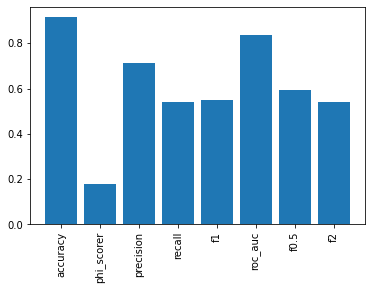

[0.9144295564345909, 0.1802834530015734, 0.7106852350560318, 0.5385691310027734, 0.5502009307776045, 0.8382773500057077, 0.5936356087951604, 0.5394463612231436]
{'accuracy': 0.9144295564345909, 'phi_scorer': 0.1802834530015734, 'precision': 0.7106852350560318, 'recall': 0.5385691310027734, 'f1': 0.5502009307776045, 'roc_auc': 0.8382773500057077, 'f0.5': 0.5936356087951604, 'f2': 0.5394463612231436}
****** Scores_oversample *******
0:	total: 377ms	remaining: 3m 8s
1:	total: 744ms	remaining: 3m 5s
2:	total: 1.12s	remaining: 3m 6s
3:	total: 1.51s	remaining: 3m 7s
4:	total: 1.89s	remaining: 3m 6s
5:	total: 2.27s	remaining: 3m 7s
6:	total: 2.65s	remaining: 3m 6s
7:	total: 3.02s	remaining: 3m 5s
8:	total: 3.39s	remaining: 3m 5s
9:	total: 3.75s	remaining: 3m 3s
10:	total: 4.12s	remaining: 3m 3s
11:	total: 4.52s	remaining: 3m 3s
12:	total: 4.9s	remaining: 3m 3s
13:	total: 5.28s	remaining: 3m 3s
14:	total: 5.67s	remaining: 3m 3s
15:	total: 6.03s	remaining: 3m 2s
16:	total: 6.4s	remaining: 3m 1s

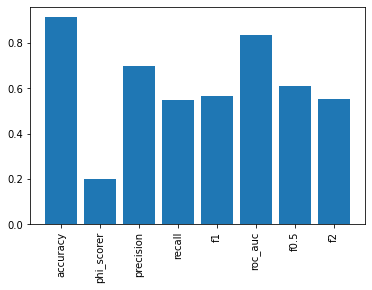

[0.9135539955283853, 0.20001956221085962, 0.7005486933437652, 0.549886987369854, 0.5673462674226758, 0.8337452151640011, 0.6114563409000133, 0.5529578374841807]
{'accuracy': 0.9135539955283853, 'phi_scorer': 0.20001956221085962, 'precision': 0.7005486933437652, 'recall': 0.549886987369854, 'f1': 0.5673462674226758, 'roc_auc': 0.8337452151640011, 'f0.5': 0.6114563409000133, 'f2': 0.5529578374841807}
****** scores_overunder *******
0:	total: 205ms	remaining: 1m 42s
1:	total: 411ms	remaining: 1m 42s
2:	total: 616ms	remaining: 1m 42s
3:	total: 815ms	remaining: 1m 41s
4:	total: 1.02s	remaining: 1m 40s
5:	total: 1.21s	remaining: 1m 39s
6:	total: 1.41s	remaining: 1m 39s
7:	total: 1.62s	remaining: 1m 39s
8:	total: 1.83s	remaining: 1m 39s
9:	total: 2.03s	remaining: 1m 39s
10:	total: 2.23s	remaining: 1m 39s
11:	total: 2.44s	remaining: 1m 39s
12:	total: 2.66s	remaining: 1m 39s
13:	total: 2.86s	remaining: 1m 39s
14:	total: 3.07s	remaining: 1m 39s
15:	total: 3.28s	remaining: 1m 39s
16:	total: 3.47s

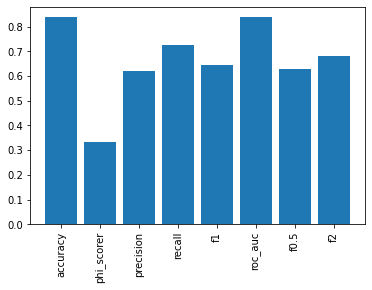

[0.836727434762895, 0.3313935567706201, 0.6207707733546094, 0.7273364371223471, 0.6451077503284797, 0.8372535237216903, 0.6266292056983922, 0.6827507838246487]
{'accuracy': 0.836727434762895, 'phi_scorer': 0.3313935567706201, 'precision': 0.6207707733546094, 'recall': 0.7273364371223471, 'f1': 0.6451077503284797, 'roc_auc': 0.8372535237216903, 'f0.5': 0.6266292056983922, 'f2': 0.6827507838246487}
****** scores_overadasyn *******
0:	total: 370ms	remaining: 3m 4s
1:	total: 733ms	remaining: 3m 2s
2:	total: 1.11s	remaining: 3m 4s
3:	total: 1.49s	remaining: 3m 4s
4:	total: 1.85s	remaining: 3m 3s
5:	total: 2.24s	remaining: 3m 4s
6:	total: 2.6s	remaining: 3m 3s
7:	total: 2.98s	remaining: 3m 3s
8:	total: 3.37s	remaining: 3m 3s
9:	total: 3.73s	remaining: 3m 3s
10:	total: 4.12s	remaining: 3m 3s
11:	total: 4.51s	remaining: 3m 3s
12:	total: 4.87s	remaining: 3m 2s
13:	total: 5.24s	remaining: 3m 1s
14:	total: 5.61s	remaining: 3m 1s
15:	total: 5.98s	remaining: 3m
16:	total: 6.35s	remaining: 3m
17:	to

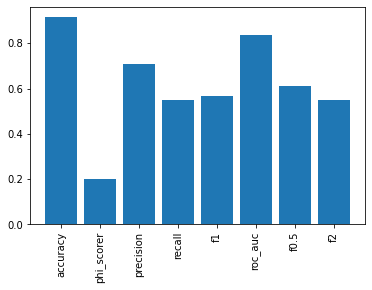

[0.914339655091543, 0.20174162955470581, 0.7101761105066207, 0.5484125732102034, 0.5654279615211841, 0.8344639288466926, 0.6112842737742219, 0.551201289703164]
{'accuracy': 0.914339655091543, 'phi_scorer': 0.20174162955470581, 'precision': 0.7101761105066207, 'recall': 0.5484125732102034, 'f1': 0.5654279615211841, 'roc_auc': 0.8344639288466926, 'f0.5': 0.6112842737742219, 'f2': 0.551201289703164}
Model:GBC and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([30.55189657, 30.4794569 ]), 'score_time': array([3.5905447 , 2.97184396]), 'test_accuracy': array([0.91379634, 0.91401523]), 'test_phi_scorer': array([0.19370415, 0.19545034]), 'test_precision': array([0.7025334 , 0.70548676]), 'test_recall': array([0.54631495, 0.54647603]), 'test_f1': array([0.56212714, 0.56242918]), 'test_f0.5': array([0.60625867, 0.60712945]), 'test_f2': array([0.54874395, 0.54892499]), 'test_roc_auc': array([0.83798855, 0.84115212])}


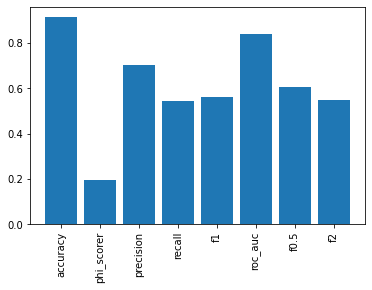

[0.9139057833924858, 0.1945772447436256, 0.7040100786038558, 0.5463954906009637, 0.5622781625902709, 0.8395703345451531, 0.6066940586757337, 0.5488344718009484]
{'accuracy': 0.9139057833924858, 'phi_scorer': 0.1945772447436256, 'precision': 0.7040100786038558, 'recall': 0.5463954906009637, 'f1': 0.5622781625902709, 'roc_auc': 0.8395703345451531, 'f0.5': 0.6066940586757337, 'f2': 0.5488344718009484}
****** Scores_oversample *******


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([102.10682559, 103.67779899]), 'score_time': array([3.62367725, 3.66043568]), 'test_accuracy': array([0.91220157, 0.91341328]), 'test_phi_scorer': array([0.21742547, 0.21778717]), 'test_precision': array([0.69100416, 0.70133646]), 'test_recall': array([0.5618754 , 0.55889551]), 'test_f1': array([0.58348306, 0.58005894]), 'test_f0.5': array([0.62488846, 0.6243397 ]), 'test_f2': array([0.56679645, 0.56342042]), 'test_roc_auc': array([0.8351453 , 0.83953184])}


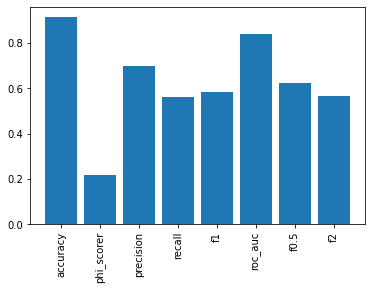

[0.9128074235056833, 0.21760632397920687, 0.6961703113720803, 0.5603854551137943, 0.5817709985399244, 0.8373385727541958, 0.624614079756581, 0.5651084345697072]
{'accuracy': 0.9128074235056833, 'phi_scorer': 0.21760632397920687, 'precision': 0.6961703113720803, 'recall': 0.5603854551137943, 'f1': 0.5817709985399244, 'roc_auc': 0.8373385727541958, 'f0.5': 0.624614079756581, 'f2': 0.5651084345697072}
****** scores_overunder *******


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([15.32537436, 16.21518087]), 'score_time': array([3.62256241, 3.95419598]), 'test_accuracy': array([0.83354962, 0.83668444]), 'test_phi_scorer': array([0.32835126, 0.33398693]), 'test_precision': array([0.61870283, 0.62147479]), 'test_recall': array([0.7270682 , 0.72956877]), 'test_f1': array([0.64244616, 0.64601894]), 'test_f0.5': array([0.62418425, 0.62735693]), 'test_f2': array([0.6807695 , 0.68419253]), 'test_roc_auc': array([0.8363058 , 0.83856951])}


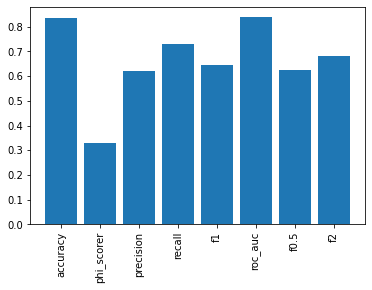

[0.8351170280961241, 0.33116909378819515, 0.6200888061891939, 0.7283184854582323, 0.6442325471507856, 0.8374376532461124, 0.6257705901979794, 0.6824810148120456]
{'accuracy': 0.8351170280961241, 'phi_scorer': 0.33116909378819515, 'precision': 0.6200888061891939, 'recall': 0.7283184854582323, 'f1': 0.6442325471507856, 'roc_auc': 0.8374376532461124, 'f0.5': 0.6257705901979794, 'f2': 0.6824810148120456}
****** scores_overadasyn *******


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([127.9414444, 130.9719975]), 'score_time': array([4.0047226 , 4.17761135]), 'test_accuracy': array([0.91369471, 0.91403086]), 'test_phi_scorer': array([0.2145341 , 0.20714937]), 'test_precision': array([0.70371081, 0.7066723 ]), 'test_recall': array([0.55648311, 0.55190688]), 'test_f1': array([0.57684648, 0.57046478]), 'test_f0.5': array([0.62179175, 0.61597909]), 'test_f2': array([0.5606418 , 0.55531607]), 'test_roc_auc': array([0.83507227, 0.83871011])}


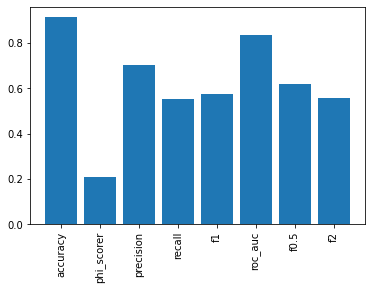

[0.9138627870979846, 0.21084173707465842, 0.7051915538090069, 0.5541949989284751, 0.5736556270343349, 0.8368911876353038, 0.6188854210453705, 0.5579789367194392]
{'accuracy': 0.9138627870979846, 'phi_scorer': 0.21084173707465842, 'precision': 0.7051915538090069, 'recall': 0.5541949989284751, 'f1': 0.5736556270343349, 'roc_auc': 0.8368911876353038, 'f0.5': 0.6188854210453705, 'f2': 0.5579789367194392}
Model:LGBM and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([7.46797562, 7.63755894]), 'score_time': array([3.88223219, 3.72659683]), 'test_accuracy': array([0.91613377, 0.91580544]), 'test_phi_scorer': array([0.19311984, 0.18322401]), 'test_precision': array([0.74542689, 0.7403889 ]), 'test_recall': array([0.53799021, 0.53491326]), 'test_f1': array([0.54945182, 0.5443025 ]), 'test_f0.5': array([0.59704791, 0.58949503]), 'test_f2': array([0.53859391, 0.53487184]), 'test_roc_auc': array([0.84230724, 0.84559109])}


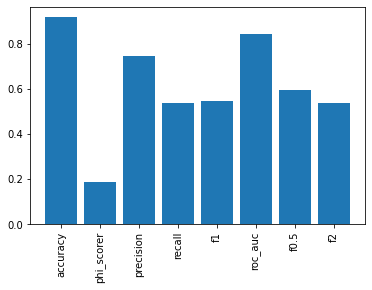

[0.9159696055285418, 0.18817192728031643, 0.7429078940938176, 0.5364517326334597, 0.5468771594527986, 0.843949162223528, 0.5932714693881539, 0.5367328709598187]
{'accuracy': 0.9159696055285418, 'phi_scorer': 0.18817192728031643, 'precision': 0.7429078940938176, 'recall': 0.5364517326334597, 'f1': 0.5468771594527986, 'roc_auc': 0.843949162223528, 'f0.5': 0.5932714693881539, 'f2': 0.5367328709598187}
****** Scores_oversample *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([12.35601306,  9.81818175]), 'score_time': array([2.8158927 , 2.91668439]), 'test_accuracy': array([0.91092731, 0.91207649]), 'test_phi_scorer': array([0.22897577, 0.23489069]), 'test_precision': array([0.68485793, 0.69338249]), 'test_recall': array([0.57090567, 0.57132708]), 'test_f1': array([0.59431223, 0.59554877]), 'test_f0.5': array([0.63228735, 0.63588686]), 'test_f2': array([0.57686477, 0.5774192 ]), 'test_roc_auc': array([0.83325916, 0.83518294])}


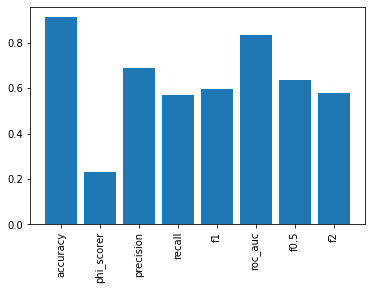

[0.9115018996544662, 0.23193322837036073, 0.6891202085998746, 0.5711163775638538, 0.5949305012643789, 0.8342210475637576, 0.6340871076942467, 0.5771419868364325]
{'accuracy': 0.9115018996544662, 'phi_scorer': 0.23193322837036073, 'precision': 0.6891202085998746, 'recall': 0.5711163775638538, 'f1': 0.5949305012643789, 'roc_auc': 0.8342210475637576, 'f0.5': 0.6340871076942467, 'f2': 0.5771419868364325}
****** scores_overunder *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([7.77585101, 7.45004797]), 'score_time': array([3.04209948, 3.11729121]), 'test_accuracy': array([0.83405776, 0.83332291]), 'test_phi_scorer': array([0.33861708, 0.34444519]), 'test_precision': array([0.62176406, 0.62310652]), 'test_recall': array([0.73541742, 0.74093461]), 'test_f1': array([0.64635487, 0.64802897]), 'test_f0.5': array([0.62739427, 0.62869387]), 'test_f2': array([0.68649232, 0.6896109 ]), 'test_roc_auc': array([0.84198294, 0.84500024])}


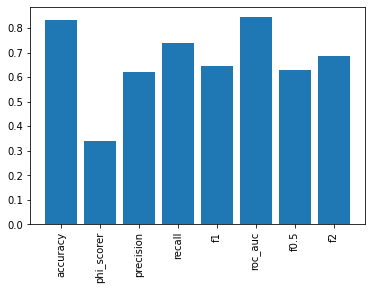

[0.8336903328694946, 0.3415311319197051, 0.6224352917955309, 0.73817601417337, 0.6471919204179521, 0.8434915906320921, 0.6280440695964731, 0.6880516076959803]
{'accuracy': 0.8336903328694946, 'phi_scorer': 0.3415311319197051, 'precision': 0.6224352917955309, 'recall': 0.73817601417337, 'f1': 0.6471919204179521, 'roc_auc': 0.8434915906320921, 'f0.5': 0.6280440695964731, 'f2': 0.6880516076959803}
****** scores_overadasyn *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([37.36633706, 39.43982506]), 'score_time': array([2.99031854, 2.96900916]), 'test_accuracy': array([0.91288169, 0.91280351]), 'test_phi_scorer': array([0.21741437, 0.2226988 ]), 'test_precision': array([0.69650772, 0.69670348]), 'test_recall': array([0.56013632, 0.56303238]), 'test_f1': array([0.58149324, 0.58532756]), 'test_f0.5': array([0.62449937, 0.62804361]), 'test_f2': array([0.56483274, 0.56813195]), 'test_roc_auc': array([0.83231107, 0.83441013])}


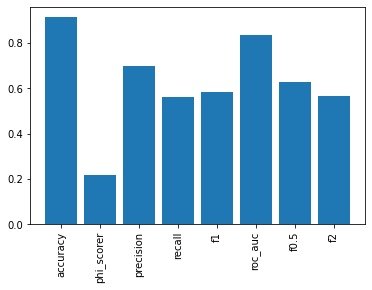

[0.9128426022920935, 0.220056585722956, 0.6966056039137948, 0.561584352549355, 0.5834104003011096, 0.8333606022813351, 0.6262714900017841, 0.5664823472560568]
{'accuracy': 0.9128426022920935, 'phi_scorer': 0.220056585722956, 'precision': 0.6966056039137948, 'recall': 0.561584352549355, 'f1': 0.5834104003011096, 'roc_auc': 0.8333606022813351, 'f0.5': 0.6262714900017841, 'f2': 0.5664823472560568}
Model:XGBoost and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([22.65970612, 22.306005  ]), 'score_time': array([2.3824656 , 2.38604355]), 'test_accuracy': array([0.73087447, 0.73184384]), 'test_phi_scorer': array([0.32015278, 0.32090452]), 'test_precision': array([0.5958101, 0.5961147]), 'test_recall': array([0.76745041, 0.76785629]), 'test_f1': array([0.58570896, 0.58643457]), 'test_f0.5': array([0.58246137, 0.58296583]), 'test_f2': array([0.64263546, 0.64343005]), 'test_roc_auc': array([0.84214697, 0.84533223])}


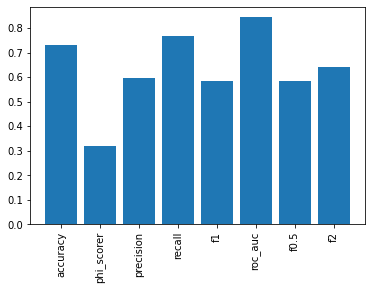

[0.7313591519567223, 0.32052864717838164, 0.5959623999114314, 0.7676533501732293, 0.5860717681122476, 0.8437395980436323, 0.5827136032627792, 0.643032752587825]
{'accuracy': 0.7313591519567223, 'phi_scorer': 0.32052864717838164, 'precision': 0.5959623999114314, 'recall': 0.7676533501732293, 'f1': 0.5860717681122476, 'roc_auc': 0.8437395980436323, 'f0.5': 0.5827136032627792, 'f2': 0.643032752587825}
****** Scores_oversample *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([42.38567638, 42.47655272]), 'score_time': array([2.44152308, 2.45544553]), 'test_accuracy': array([0.60735002, 0.61118842]), 'test_phi_scorer': array([0.27004624, 0.27339648]), 'test_precision': array([0.5757757 , 0.57676021]), 'test_recall': array([0.74059485, 0.74343875]), 'test_f1': array([0.50594372, 0.50877352]), 'test_f0.5': array([0.53178594, 0.53371605]), 'test_f2': array([0.55585232, 0.55929227]), 'test_roc_auc': array([0.83148545, 0.83305347])}


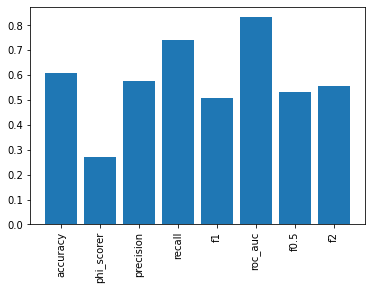

[0.609269219343642, 0.2717213618324429, 0.5762679548445249, 0.7420167972638569, 0.5073586213797774, 0.8322694583724943, 0.5327509928291183, 0.5575722939541274]
{'accuracy': 0.609269219343642, 'phi_scorer': 0.2717213618324429, 'precision': 0.5762679548445249, 'recall': 0.7420167972638569, 'f1': 0.5073586213797774, 'roc_auc': 0.8322694583724943, 'f0.5': 0.5327509928291183, 'f2': 0.5575722939541274}
****** scores_overunder *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([12.16250587, 11.80365682]), 'score_time': array([2.78374147, 2.79316163]), 'test_accuracy': array([0.46124079, 0.4511953 ]), 'test_phi_scorer': array([0.21738631, 0.21625713]), 'test_precision': array([0.56258669, 0.56263458]), 'test_recall': array([0.68876541, 0.68666662]), 'test_f1': array([0.40937418, 0.40267383]), 'test_f0.5': array([0.46835078, 0.46374761]), 'test_f2': array([0.44904288, 0.44221725]), 'test_roc_auc': array([0.84094701, 0.84465067])}


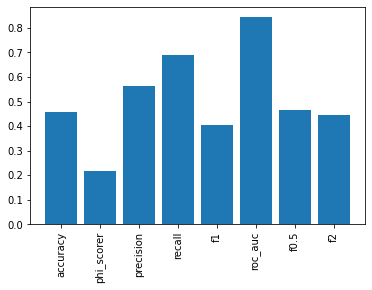

[0.45621804593567755, 0.21682171680899545, 0.5626106351722875, 0.6877160167870007, 0.40602400402095823, 0.8427988388582389, 0.46604919469308903, 0.44563006494981094]
{'accuracy': 0.45621804593567755, 'phi_scorer': 0.21682171680899545, 'precision': 0.5626106351722875, 'recall': 0.6877160167870007, 'f1': 0.40602400402095823, 'roc_auc': 0.8427988388582389, 'f0.5': 0.46604919469308903, 'f2': 0.44563006494981094}
****** scores_overadasyn *******


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'fit_time': array([69.39143372, 72.34803557]), 'score_time': array([2.46760607, 2.46844745]), 'test_accuracy': array([0.59941525, 0.59979831]), 'test_phi_scorer': array([0.26607661, 0.26921542]), 'test_precision': array([0.57457557, 0.57544984]), 'test_recall': array([0.73733228, 0.74014941]), 'test_f1': array([0.50066464, 0.5014746 ]), 'test_f0.5': array([0.52839311, 0.5291497 ]), 'test_f2': array([0.54978422, 0.55110235]), 'test_roc_auc': array([0.83145751, 0.83321511])}


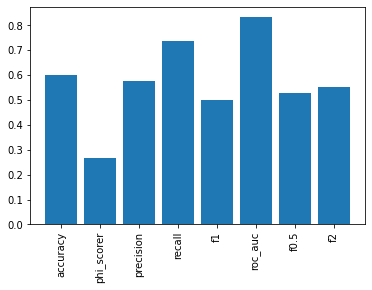

[0.5996067793430166, 0.267646011898668, 0.5750127080021343, 0.7387408403431359, 0.5010696180000899, 0.8323363100388648, 0.5287714036146642, 0.5504432858000003]
{'accuracy': 0.5996067793430166, 'phi_scorer': 0.267646011898668, 'precision': 0.5750127080021343, 'recall': 0.7387408403431359, 'f1': 0.5010696180000899, 'roc_auc': 0.8323363100388648, 'f0.5': 0.5287714036146642, 'f2': 0.5504432858000003}
Model:DT and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******
{'fit_time': array([4.54343963, 4.54264736]), 'score_time': array([2.25610685, 2.29439425]), 'test_accuracy': array([0.74278835, 0.70593662]), 'test_phi_scorer': array([0.30067152, 0.29060917]), 'test_precision': array([0.59177114, 0.58552774]), 'test_recall': array([0.74627395, 0.74686052]), 'test_f1': array([0.58688595, 0.56468657]), 'test_f0.5': array([0.58162811, 0.56733668]), 'test_f2': array([0.63925858, 0.61765474]), 'test_roc_auc': array([0.8098671 , 0.81383179])}


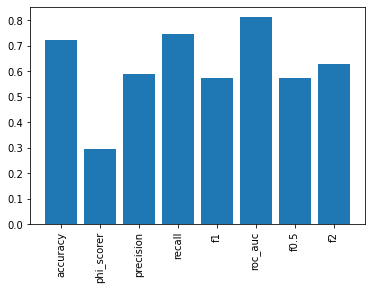

[0.7243624822151691, 0.2956403453163504, 0.5886494380806262, 0.7465672387874644, 0.575786257578004, 0.8118494466007635, 0.5744823942997382, 0.6284566617859624]
{'accuracy': 0.7243624822151691, 'phi_scorer': 0.2956403453163504, 'precision': 0.5886494380806262, 'recall': 0.7465672387874644, 'f1': 0.575786257578004, 'roc_auc': 0.8118494466007635, 'f0.5': 0.5744823942997382, 'f2': 0.6284566617859624}
****** Scores_oversample *******
{'fit_time': array([8.76969647, 8.70065117]), 'score_time': array([2.45189285, 2.53817415]), 'test_accuracy': array([0.85652527, 0.82758486]), 'test_phi_scorer': array([0.2599083 , 0.27067161]), 'test_precision': array([0.60861748, 0.59986336]), 'test_recall': array([0.65548217, 0.68340842]), 'test_f1': array([0.62486001, 0.61842243]), 'test_f0.5': array([0.61386258, 0.60408679]), 'test_f2': array([0.64090369, 0.64824014]), 'test_roc_auc': array([0.78278521, 0.78830948])}


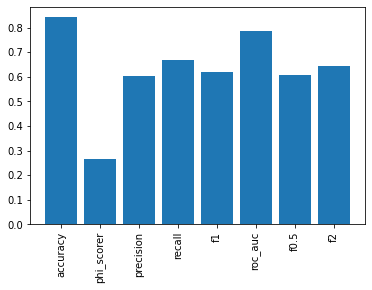

[0.8420550665269939, 0.2652899561622891, 0.6042404192386995, 0.669445291769601, 0.6216412178618571, 0.7855473435842886, 0.6089746820941406, 0.6445719129100471]
{'accuracy': 0.8420550665269939, 'phi_scorer': 0.2652899561622891, 'precision': 0.6042404192386995, 'recall': 0.669445291769601, 'f1': 0.6216412178618571, 'roc_auc': 0.7855473435842886, 'f0.5': 0.6089746820941406, 'f2': 0.6445719129100471}
****** scores_overunder *******
{'fit_time': array([7.84197569, 8.41334105]), 'score_time': array([3.04816175, 2.59175873]), 'test_accuracy': array([0.74278835, 0.68522804]), 'test_phi_scorer': array([0.30067152, 0.2877382 ]), 'test_precision': array([0.59177114, 0.58335105]), 'test_recall': array([0.74627395, 0.74832703]), 'test_f1': array([0.58688595, 0.55285867]), 'test_f0.5': array([0.58162811, 0.56018809]), 'test_f2': array([0.63925858, 0.60596088]), 'test_roc_auc': array([0.80869085, 0.81403892])}


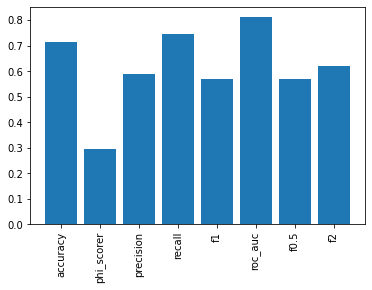

[0.7140081927484795, 0.29420486030048726, 0.5875610928181831, 0.7473004897101924, 0.5698723089189194, 0.8113648855322871, 0.5709081037219854, 0.6226097311113645]
{'accuracy': 0.7140081927484795, 'phi_scorer': 0.29420486030048726, 'precision': 0.5875610928181831, 'recall': 0.7473004897101924, 'f1': 0.5698723089189194, 'roc_auc': 0.8113648855322871, 'f0.5': 0.5709081037219854, 'f2': 0.6226097311113645}
****** scores_overadasyn *******
{'fit_time': array([36.50118995, 39.15510607]), 'score_time': array([2.6966064 , 2.54111576]), 'test_accuracy': array([0.85652527, 0.84587783]), 'test_phi_scorer': array([0.2599083 , 0.28259163]), 'test_precision': array([0.60861748, 0.61040605]), 'test_recall': array([0.65548217, 0.68082801]), 'test_f1': array([0.62486001, 0.63057239]), 'test_f0.5': array([0.61386258, 0.61616522]), 'test_f2': array([0.64090369, 0.65528941]), 'test_roc_auc': array([0.78278521, 0.7909268 ])}


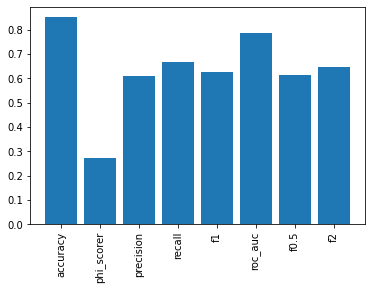

[0.8512015509936053, 0.27124996647688193, 0.6095117689021552, 0.6681550885355769, 0.6277161983896871, 0.7868560049806324, 0.615013897884843, 0.6480965498650033]
{'accuracy': 0.8512015509936053, 'phi_scorer': 0.27124996647688193, 'precision': 0.6095117689021552, 'recall': 0.6681550885355769, 'f1': 0.6277161983896871, 'roc_auc': 0.7868560049806324, 'f0.5': 0.615013897884843, 'f2': 0.6480965498650033}
Model:RF and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******


/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set

{'fit_time': array([5.35257816, 5.20138121]), 'score_time': array([2.64290214, 2.64033389]), 'test_accuracy': array([0.9144061, 0.9144061]), 'test_phi_scorer': array([0., 0.]), 'test_precision': array([0.45720305, 0.45720305]), 'test_recall': array([0.5, 0.5]), 'test_f1': array([0.47764479, 0.47764479]), 'test_f0.5': array([0.46516613, 0.46516613]), 'test_f2': array([0.49081142, 0.49081142]), 'test_roc_auc': array([0.80288893, 0.78354305])}


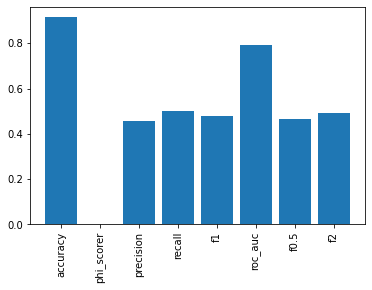

[0.9144061039103175, 0.0, 0.45720305195515876, 0.5, 0.47764479127107606, 0.793215988446498, 0.4651661282035375, 0.4908114213973286]
{'accuracy': 0.9144061039103175, 'phi_scorer': 0.0, 'precision': 0.45720305195515876, 'recall': 0.5, 'f1': 0.47764479127107606, 'roc_auc': 0.793215988446498, 'f0.5': 0.4651661282035375, 'f2': 0.4908114213973286}
****** Scores_oversample *******


/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


{'fit_time': array([8.77178717, 8.39100933]), 'score_time': array([2.53597164, 2.41551328]), 'test_accuracy': array([0.77071249, 0.81093357]), 'test_phi_scorer': array([0.29151177, 0.26395494]), 'test_precision': array([0.59300359, 0.59309814]), 'test_recall': array([0.72842965, 0.68709346]), 'test_f1': array([0.5986605 , 0.60871757]), 'test_f0.5': array([0.58867262, 0.59536248]), 'test_f2': array([0.64592484, 0.64245816]), 'test_roc_auc': array([0.8130964 , 0.79654249])}


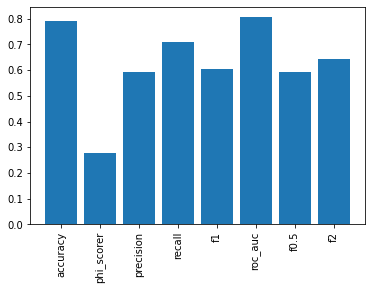

[0.7908230272518332, 0.2777333529122749, 0.5930508644835142, 0.7077615525661013, 0.6036890346833063, 0.8048194431842006, 0.5920175488143015, 0.6441914989025204]
{'accuracy': 0.7908230272518332, 'phi_scorer': 0.2777333529122749, 'precision': 0.5930508644835142, 'recall': 0.7077615525661013, 'f1': 0.6036890346833063, 'roc_auc': 0.8048194431842006, 'f0.5': 0.5920175488143015, 'f2': 0.6441914989025204}
****** scores_overunder *******


/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


{'fit_time': array([7.61621523, 7.41085887]), 'score_time': array([2.37296867, 2.45666075]), 'test_accuracy': array([0.88290936, 0.88287809]), 'test_phi_scorer': array([0.2334313 , 0.26074758]), 'test_precision': array([0.61968139, 0.62883024]), 'test_recall': array([0.6138234 , 0.63193584]), 'test_f1': array([0.61663625, 0.63035418]), 'test_f0.5': array([0.61843424, 0.62943303]), 'test_f2': array([0.61492185, 0.63129611]), 'test_roc_auc': array([0.81005742, 0.81168624])}


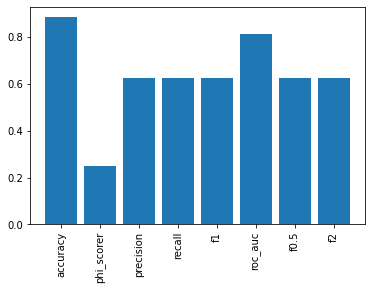

[0.8828937287950094, 0.24708944154124013, 0.6242558144346047, 0.6228796199455613, 0.6234952161897587, 0.8108718316048155, 0.6239336368422086, 0.6231089752681415]
{'accuracy': 0.8828937287950094, 'phi_scorer': 0.24708944154124013, 'precision': 0.6242558144346047, 'recall': 0.6228796199455613, 'f1': 0.6234952161897587, 'roc_auc': 0.8108718316048155, 'f0.5': 0.6239336368422086, 'f2': 0.6231089752681415}
****** scores_overadasyn *******


/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


{'fit_time': array([35.96201611, 38.27733159]), 'score_time': array([2.39307904, 2.36350393]), 'test_accuracy': array([0.78729342, 0.75745399]), 'test_phi_scorer': array([0.29183568, 0.27438146]), 'test_precision': array([0.59597478, 0.58627359]), 'test_recall': array([0.72185012, 0.71815828]), 'test_f1': array([0.60707974, 0.58682247]), 'test_f0.5': array([0.59463158, 0.57966122]), 'test_f2': array([0.651509  , 0.63273838]), 'test_roc_auc': array([0.80384617, 0.79562493])}


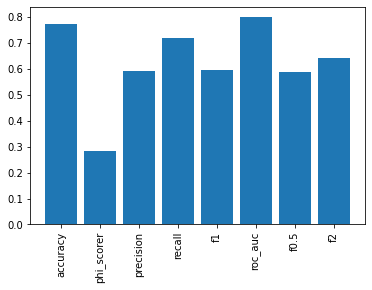

[0.772373708156788, 0.28310857224249203, 0.5911241834122387, 0.7200041961091082, 0.596951104738725, 0.7997355510677773, 0.5871464017484197, 0.6421236890970827]
{'accuracy': 0.772373708156788, 'phi_scorer': 0.28310857224249203, 'precision': 0.5911241834122387, 'recall': 0.7200041961091082, 'f1': 0.596951104738725, 'roc_auc': 0.7997355510677773, 'f0.5': 0.5871464017484197, 'f2': 0.6421236890970827}
Model:NB and Encoder:<class 'category_encoders.target_encoder.TargetEncoder'>
****** Scores_imbl *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([4.05050731, 4.19489932]), 'score_time': array([2.23186922, 2.19677186]), 'test_accuracy': array([0.91269407, 0.91227192]), 'test_phi_scorer': array([0.0383274 , 0.03242942]), 'test_precision': array([0.58927565, 0.57234012]), 'test_recall': array([0.50411363, 0.50363445]), 'test_f1': array([0.48784495, 0.48716751]), 'test_f0.5': array([0.48900673, 0.4874747 ]), 'test_f2': array([0.49665241, 0.49614026]), 'test_roc_auc': array([0.65412045, 0.64961704])}


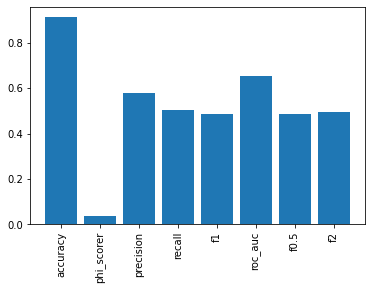

[0.9124829969199018, 0.03537840833828571, 0.5808078851055685, 0.5038740437787828, 0.48750623219884937, 0.6518687466584561, 0.488240713443583, 0.4963963346858356]
{'accuracy': 0.9124829969199018, 'phi_scorer': 0.03537840833828571, 'precision': 0.5808078851055685, 'recall': 0.5038740437787828, 'f1': 0.48750623219884937, 'roc_auc': 0.6518687466584561, 'f0.5': 0.488240713443583, 'f2': 0.4963963346858356}
****** Scores_oversample *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([7.49962664, 7.2369771 ]), 'score_time': array([2.33746958, 2.38241029]), 'test_accuracy': array([0.84622962, 0.84549477]), 'test_phi_scorer': array([0.15419875, 0.15205937]), 'test_precision': array([0.56747529, 0.5664182 ]), 'test_recall': array([0.58809615, 0.58703207]), 'test_f1': array([0.57499085, 0.5738716 ]), 'test_f0.5': array([0.56994995, 0.56885853]), 'test_f2': array([0.58201658, 0.58091039]), 'test_roc_auc': array([0.65247453, 0.64834821])}


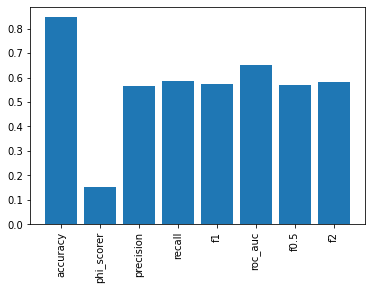

[0.8458621929673698, 0.15312906270530774, 0.5669467466743872, 0.5875641103100055, 0.5744312280929622, 0.6504113699465789, 0.5694042404018159, 0.5814634861414573]
{'accuracy': 0.8458621929673698, 'phi_scorer': 0.15312906270530774, 'precision': 0.5669467466743872, 'recall': 0.5875641103100055, 'f1': 0.5744312280929622, 'roc_auc': 0.6504113699465789, 'f0.5': 0.5694042404018159, 'f2': 0.5814634861414573}
****** scores_overunder *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([7.47071385, 7.18583226]), 'score_time': array([2.32669044, 2.32839203]), 'test_accuracy': array([0.8761394 , 0.87653028]), 'test_phi_scorer': array([0.14369191, 0.14475144]), 'test_precision': array([0.57821199, 0.57896535]), 'test_recall': array([0.56599808, 0.56633599]), 'test_f1': array([0.5711721 , 0.57166487]), 'test_f0.5': array([0.57513822, 0.57577173]), 'test_f2': array([0.56787412, 0.5682638 ]), 'test_roc_auc': array([0.6516883 , 0.64731881])}


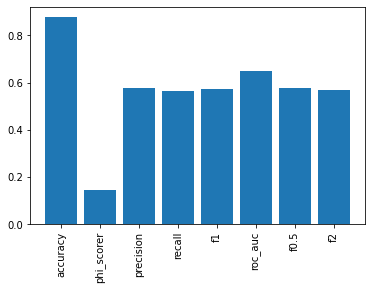

[0.8763348395065589, 0.14422167816791265, 0.5785886725922424, 0.5661670373438064, 0.5714184827312476, 0.6495035552145865, 0.5754549745732113, 0.5680689610768854]
{'accuracy': 0.8763348395065589, 'phi_scorer': 0.14422167816791265, 'precision': 0.5785886725922424, 'recall': 0.5661670373438064, 'f1': 0.5714184827312476, 'roc_auc': 0.6495035552145865, 'f0.5': 0.5754549745732113, 'f2': 0.5680689610768854}
****** scores_overadasyn *******


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([34.61522579, 37.19836354]), 'score_time': array([2.34112668, 2.43845654]), 'test_accuracy': array([0.84112478, 0.83971763]), 'test_phi_scorer': array([0.15061946, 0.14912668]), 'test_precision': array([0.56445296, 0.56346799]), 'test_recall': array([0.58799527, 0.58759836]), 'test_f1': array([0.5723958, 0.5714365]), 'test_f0.5': array([0.56693031, 0.56591374]), 'test_f2': array([0.58056624, 0.57984989]), 'test_roc_auc': array([0.65091545, 0.64705843])}


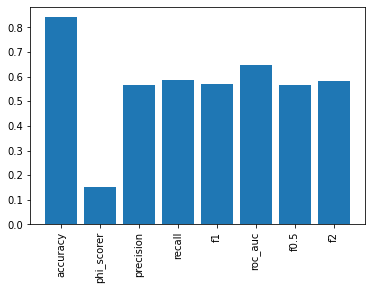

[0.8404212073359496, 0.14987307245478948, 0.5639604753390836, 0.5877968146855262, 0.5719161506241608, 0.6489869421778574, 0.5664220284208679, 0.5802080644779088]
{'accuracy': 0.8404212073359496, 'phi_scorer': 0.14987307245478948, 'precision': 0.5639604753390836, 'recall': 0.5877968146855262, 'f1': 0.5719161506241608, 'roc_auc': 0.6489869421778574, 'f0.5': 0.5664220284208679, 'f2': 0.5802080644779088}


In [ ]:
encoder_list = [
              ##ce.one_hot.OneHotEncoder,
                ce.target_encoder.TargetEncoder
                ]

dict_classifiers = {
    "Logreg": LogisticRegression(solver='lbfgs', C = 100, penalty = 'l2'),

    #Instance based
    ##"KNN": KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', algorithm = 'auto', leaf_size = 5),

    #Ensemble boosting method
    "AdaBoost": AdaBoostClassifier(random_state=42, algorithm='SAMME.R', learning_rate=0.8, n_estimators=400),
    "CatBoost": CatBoostClassifier(iterations=500,learning_rate=0.02,depth=12,eval_metric='AUC',random_seed = 42,bagging_temperature = 0.2,od_type='Iter',od_wait=100),
    "GBC": GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7),
    "LGBM": LGBMClassifier(max_bin=255, n_estimators=100,lambda_l1= 10, lambda_l2=10, max_depth=5, min_data_in_leaf=10, num_leaves= 10),
    "XGBoost": XGBClassifier(tree_method='approx', max_bin=255, n_estimators=100, objective='binary:logistic', scale_pos_weight = 11),

    #Tree based methods
    "DT": DecisionTreeClassifier(random_state = 42, max_depth=10, max_leaf_nodes=15, class_weight='balanced'),
    "RF": RandomForestClassifier(n_estimators = 10, max_depth = 5, min_samples_leaf =0.1, min_samples_split= 2, max_leaf_nodes = 15, max_features = 'sqrt'),

    #SVM based methods
    ##"LinearSVM": SVC(probability=True, kernel='linear'),
    ##"RbfSVM": SVC(probability=True, kernel='rbf'),

    #probabilistic
    "NB": GaussianNB(var_smoothing = 1)
}

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'phi_scorer': make_scorer(matthews_corrcoef, greater_is_better=True),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'f0.5':make_scorer(fbeta_score,beta = 0.5, average='macro'),
                 'f2':make_scorer(fbeta_score,beta = 2.0, average='macro'),
                 'roc_auc': make_scorer(roc_auc_score, greater_is_better=True,needs_threshold=True)
                }

for model_name, model_instantiation in dict_classifiers.items():
  for encoder in encoder_list:

    num_pipeline = Pipeline([('scaler',StandardScaler())])
    cat_pipeline = Pipeline([('enc', encoder())])

    oversample = SMOTE()
    over = SMOTE(sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=0.5)
    adasyn = ADASYN()

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline,numerical_col),
        ('cat', cat_pipeline,categorical_col)])

    pipe_imbl = Pipeline(steps=
                    [('preprocessor', preprocessor),
                     ('classifier', model_instantiation)])
    pipe_oversample = Pipeline(steps=
                    [('preprocessor', preprocessor),
                     ('os',oversample),
                     ('classifier', model_instantiation)])

    pipe_overunder = Pipeline(steps=
                    [('preprocessor', preprocessor),
                     ('over', over), ('under', under),
                     ('classifier', model_instantiation)])
    pipe_overadasyn = Pipeline(steps=
                    [('preprocessor', preprocessor),
                     ('adasyn', adasyn),
                     ('classifier', model_instantiation)])

    print("Model:{} and Encoder:{}".format(model_name,encoder))

    cv = StratifiedKFold(n_splits=2,shuffle=True,random_state=100)

    print("****** Scores_imbl *******")
    scores_imbl = cross_validate(pipe_imbl, X_train, Y_train, scoring=custom_scorer, cv=cv)
    eval_score(scores_imbl)

    print("****** Scores_oversample *******")
    scores_oversample = cross_validate(pipe_oversample, X_train, Y_train, scoring=custom_scorer, cv=cv)
    eval_score(scores_oversample)

    print("****** scores_overunder *******")
    scores_overunder = cross_validate(pipe_overunder, X_train, Y_train, scoring=custom_scorer, cv=cv)
    eval_score(scores_overunder)

    print("****** scores_overadasyn *******")
    scores_overadasyn = cross_validate(pipe_overadasyn, X_train, Y_train, scoring=custom_scorer, cv=cv)
    eval_score(scores_overadasyn)
